In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('spotify_data.csv')

In [3]:
data

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.69400,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.47700,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.33800,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.80700,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.07260,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1298745,Akkarai Subhalakshmi,Sravanam - Madhyamavathi - Adi (Live),1tpOChGX8v34yHVukGk8DG,0,2009,indian,0.419,0.748,2,-10.657,1,0.1940,0.67400,0.000022,0.0800,0.827,171.229,873027,4
1048571,1298746,Fossils,Guru,2NU6Ne7jNlunEkmat52m8W,13,2009,indian,0.576,0.787,2,-6.503,1,0.0459,0.00313,0.000621,0.3780,0.593,112.010,348475,4
1048572,1298747,Lalgudi Vijayalakshmi,Nidhichala,4w11WNonK6ZRGyWVWLWM8n,0,2009,indian,0.534,0.314,4,-13.593,1,0.0533,0.95100,0.762000,0.2890,0.490,138.522,1582187,4
1048573,1298748,Lalgudi Vijayalakshmi,Govardhana,1ypYdGD0dz8bRLUF9kdG1L,0,2009,indian,0.494,0.319,4,-14.487,0,0.0536,0.95800,0.784000,0.1010,0.398,150.335,801213,3


##### Description

##### Popularity - Track popularity (0 to 100)
##### Year - Year released (2000 to 2023)
##### Danceability - Track suitability for dancing (0.0 to 1.0)
##### Energy - The perceptual measure of intensity and activity (0.0 to 1.0)
##### Key - The key, the track is in (1 to 11)
##### Loudness - Overall loudness of track in decibels (-60 to 0 dB)
##### Mode - Modality of the track (Major '1'/ Minor '0')
##### Speechiness - Presence of spoken words in the track
##### Acousticness - Confidence measure from 0 to 1 of whether the track is
##### acoustic
##### Instrumentalness - Whether tracks contain vocals. (0.0 to 1.0)
##### Liveness - Presence of audience in the recording (0.0 - 1.0)
##### Valence - Musical positiveness (0.0 to 1.0)
##### Tempo - Tempo of the track in beats per minute (BPM)
##### Time_signature - Estimated time signature (3 to 7)
##### Duration_ms - Duration of track in milliseconds

## EDA

In [4]:
data.shape

(1048575, 20)

In [5]:
data.nunique()

Unnamed: 0          1048575
artist_name           61825
track_name           802270
track_id            1048575
popularity               98
year                     22
genre                    82
danceability           1363
energy                 3087
key                      12
loudness              37000
mode                      2
speechiness            1655
acousticness           5398
instrumentalness       5402
liveness               1813
valence                2135
tempo                133568
duration_ms          247034
time_signature            5
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.820514e+05,1.874687e+01,2.012135e+03,5.377796e-01,6.387387e-01,5.286472e+00,-9.001836e+00,6.337620e-01,9.306985e-02,3.216099e-01,2.518109e-01,2.224674e-01,4.542687e-01,1.213105e+02,2.479807e+05,3.886117e+00
std,3.755241e+05,1.607041e+01,7.128070e+00,1.845742e-01,2.707980e-01,3.556115e+00,5.710919e+00,4.817758e-01,1.269212e-01,3.547914e-01,3.649522e-01,2.004279e-01,2.682246e-01,2.978620e+01,1.446411e+05,4.672870e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.609800e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.621435e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.520000e-01,2.000000e+00,-1.084400e+01,0.000000e+00,3.720000e-02,6.570000e-03,1.050000e-06,9.790000e-02,2.250000e-01,9.863750e+01,1.803915e+05,4.000000e+00
50%,5.242870e+05,1.600000e+01,2.013000e+03,5.510000e-01,6.920000e-01,5.000000e+00,-7.463000e+00,1.000000e+00,5.070000e-02,1.480000e-01,1.730000e-03,1.340000e-01,4.360000e-01,1.216590e+02,2.248270e+05,4.000000e+00
75%,9.088995e+05,2.900000e+01,2.018000e+03,6.780000e-01,8.720000e-01,8.000000e+00,-5.285000e+00,1.000000e+00,8.930000e-02,6.390000e-01,6.110000e-01,2.910000e-01,6.720000e-01,1.398900e+02,2.851730e+05,4.000000e+00
max,1.298749e+06,1.000000e+02,2.023000e+03,9.920000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.498980e+02,6.000495e+06,5.000000e+00


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   artist_name       1048575 non-null  object 
 2   track_name        1048575 non-null  object 
 3   track_id          1048575 non-null  object 
 4   popularity        1048575 non-null  int64  
 5   year              1048575 non-null  int64  
 6   genre             1048575 non-null  object 
 7   danceability      1048575 non-null  float64
 8   energy            1048575 non-null  float64
 9   key               1048575 non-null  int64  
 10  loudness          1048575 non-null  float64
 11  mode              1048575 non-null  int64  
 12  speechiness       1048575 non-null  float64
 13  acousticness      1048575 non-null  float64
 14  instrumentalness  1048575 non-null  float64
 15  liveness          1048575 non-null  float64
 16  

In [8]:
data.isnull().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [9]:
data1 = data[['artist_name', 'track_name','popularity','genre']]

In [10]:
data2 = data1.sort_values(by = 'popularity', ascending = False)

##### Top 50 songs

In [11]:
data2.head(50)

,artist_name,track_name,popularity,genre
612503,Miley Cyrus,Flowers,100,pop
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",96,hip-hop
612504,The Weeknd,Die For You - Remix,95,pop
569184,SZA,Kill Bill,94,pop
569195,Manuel Turizo,La Bachata,93,pop
541577,David Guetta,I'm Good (Blue),93,dance
569191,Rema,Calm Down (with Selena Gomez),93,pop
569190,Sam Smith,Unholy (feat. Kim Petras),92,pop
608232,NewJeans,OMG,92,k-pop
569188,d4vd,Here With Me,92,pop


In [12]:
data1['artist_name'].nunique()

61825

In [13]:
data1['genre'].nunique()

82

In [14]:
genre_counts = data['genre'].value_counts()
genre_counts

ambient           20421
black-metal       20102
gospel            19931
acoustic          19308
alt-rock          19257
                  ...  
chicago-house      4685
dubstep            3785
detroit-techno     3586
rock               3050
songwriter          583
Name: genre, Length: 82, dtype: int64

In [15]:
data4 = data1[data1['popularity']>=75]

#####  Songs that are highly popular (>75)

In [16]:
data4

,artist_name,track_name,popularity,genre
1770,Neon Trees,Everybody Talks,77,alt-rock
12104,Bruno Mars,Locked out of Heaven,85,dance
12105,MKTO,Classic,79,dance
12106,Pitbull,Timber (feat. Ke$ha),80,dance
12107,Calvin Harris,Feel So Close - Radio Edit,78,dance
...,...,...,...,...
1016225,Estelle,American Boy,76,soul
1029215,Jay Sean,Down,76,dance
1029218,Shakira,She Wolf,77,dance
1047468,JAY-Z,Run This Town,80,hip-hop


In [17]:
grouped_data1 = data4.groupby('genre')['artist_name'].count()
grouped_data1

genre
acoustic               2
alt-rock              19
ambient                4
blues                  1
chicago-house          2
chill                  4
club                   1
country               62
dance                251
disco                  3
edm                    9
electro               29
emo                   23
folk                  11
forro                  4
french                 5
funk                  32
garage                 9
german                 4
hard-rock              1
hardstyle              1
hip-hop              248
house                  8
indian                 7
indie-pop             49
jazz                   5
k-pop                 54
metal                 16
piano                  3
pop                  375
pop-film               3
punk                   1
rock                  21
sad                   57
sertanejo             27
singer-songwriter      3
sleep                  3
soul                   5
Name: artist_name, dtype: int64

In [18]:
Popularity = data[data['popularity'] >= 75][['artist_name', 'popularity']]

In [19]:
Popularity

,artist_name,popularity
1770,Neon Trees,77
12104,Bruno Mars,85
12105,MKTO,79
12106,Pitbull,80
12107,Calvin Harris,78
...,...,...
1016225,Estelle,76
1029215,Jay Sean,76
1029218,Shakira,77
1047468,JAY-Z,80


In [20]:
pp = Popularity.sort_values(by = 'popularity', ascending = False)
pp.groupby (by = 'artist_name')['popularity'].count()

artist_name
$uicideboy$     5
(G)I-DLE        2
1nonly          2
21 Savage       6
24kGoldn        1
               ..
salvia palth    1
t.A.T.u.        1
will.i.am       1
Ñengo Flow      1
Öwnboss         1
Name: popularity, Length: 565, dtype: int64

In [21]:
data['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
      dtype=int64)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'time_signature'}>]], dtype=object)

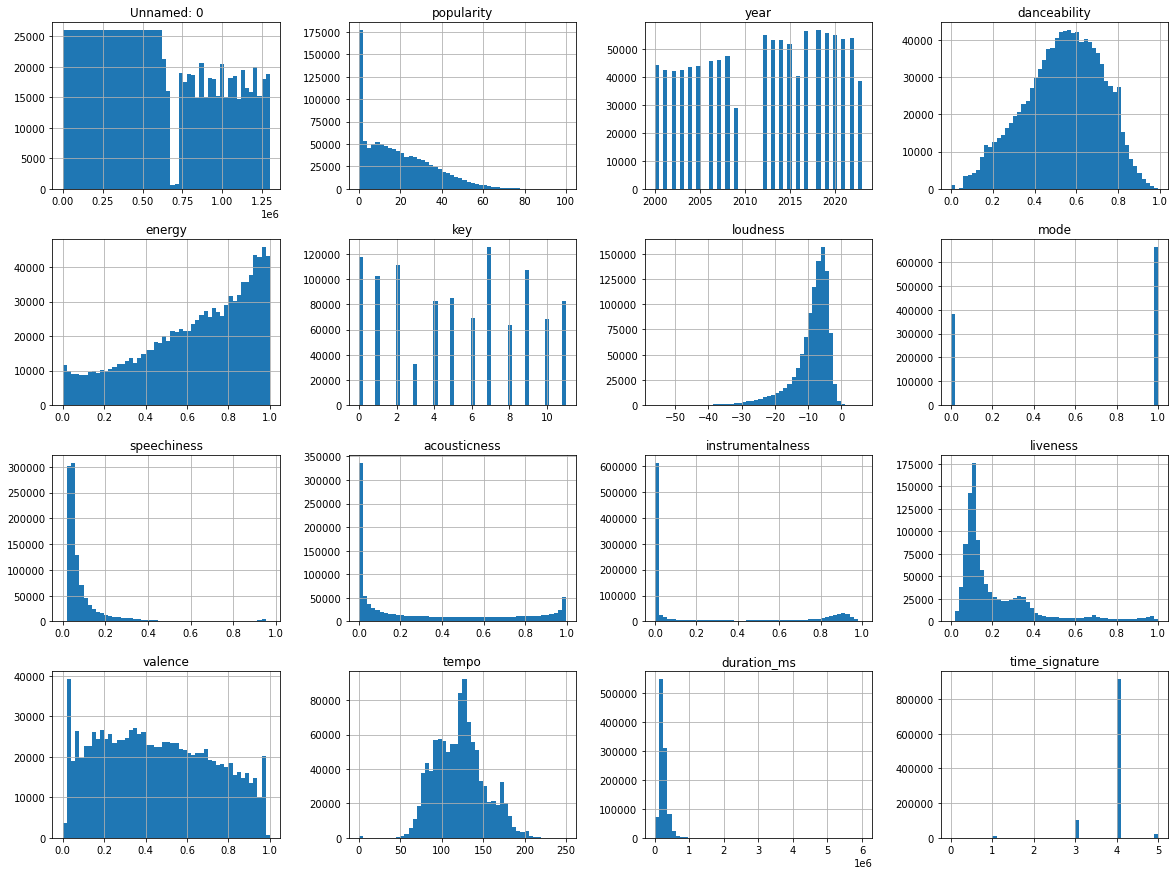

In [22]:
data.hist(bins=50, figsize=(20, 15))

##### The features Danceability and tempo follows normal distribution while Liveliness, Speechiness follows right skewed distribution and Energy and loudness follows left skewed distribuition.

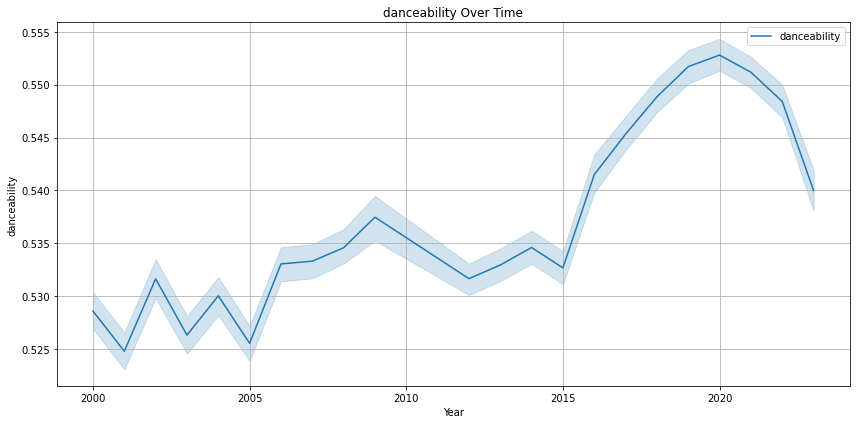

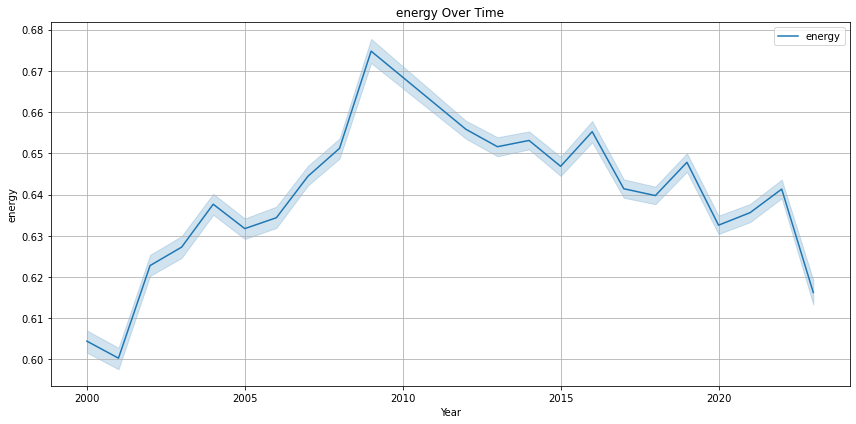

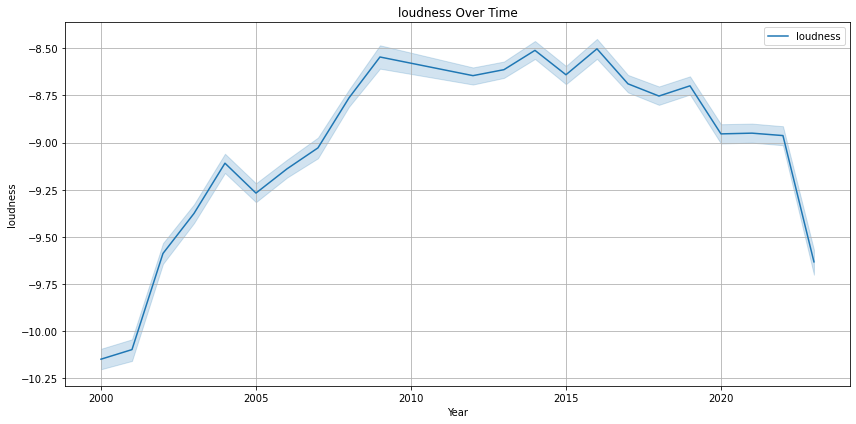

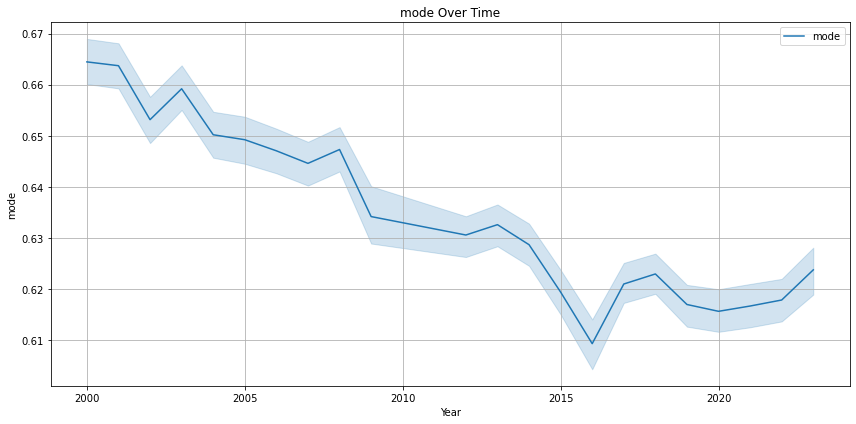

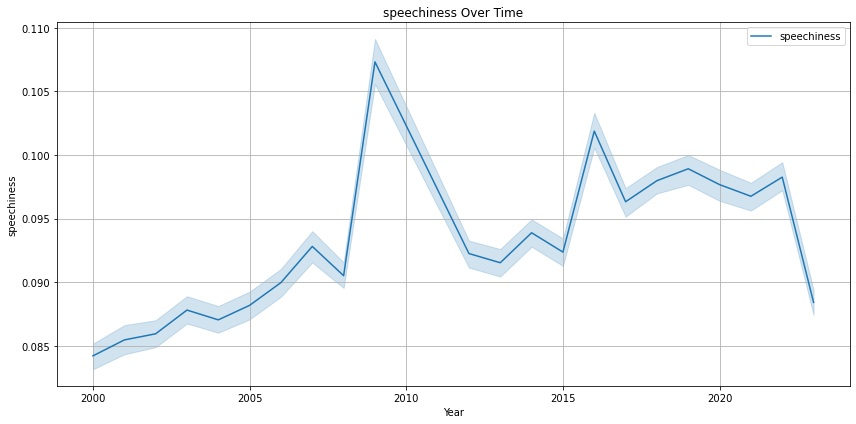

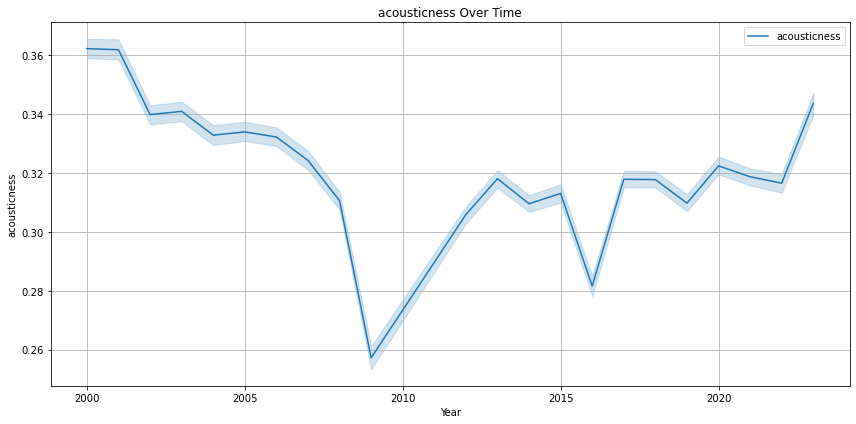

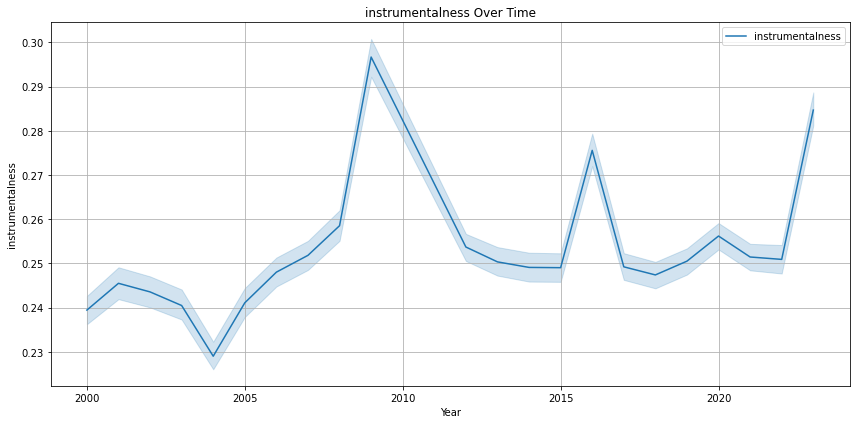

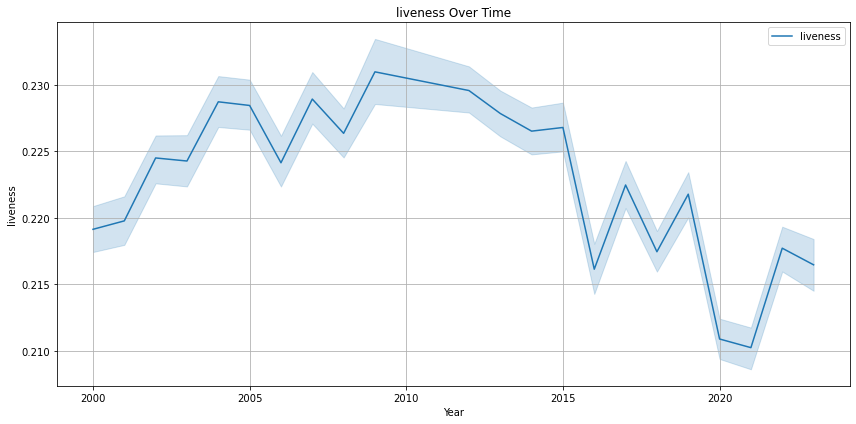

In [24]:
features_to_plot = ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

for feature in features_to_plot:
    plt.figure(figsize=(12, 6))  
    sns.lineplot(data=data, x='year', y=feature, label=feature)    
    plt.title(f'{feature} Over Time')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### These line plots show how these features changed over time.

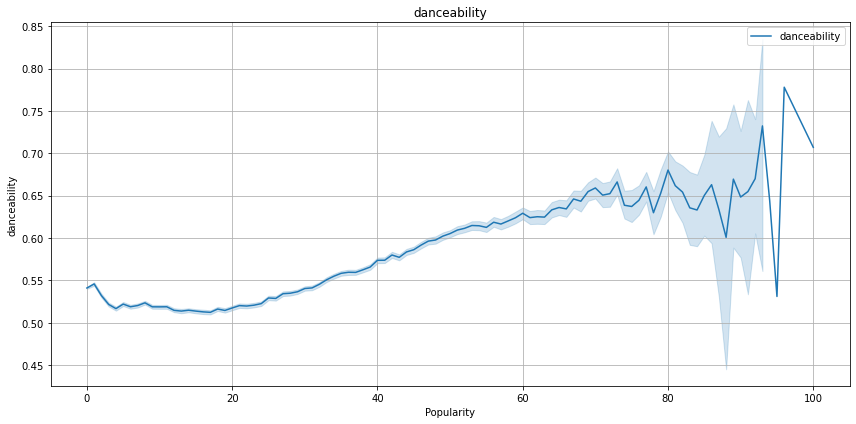

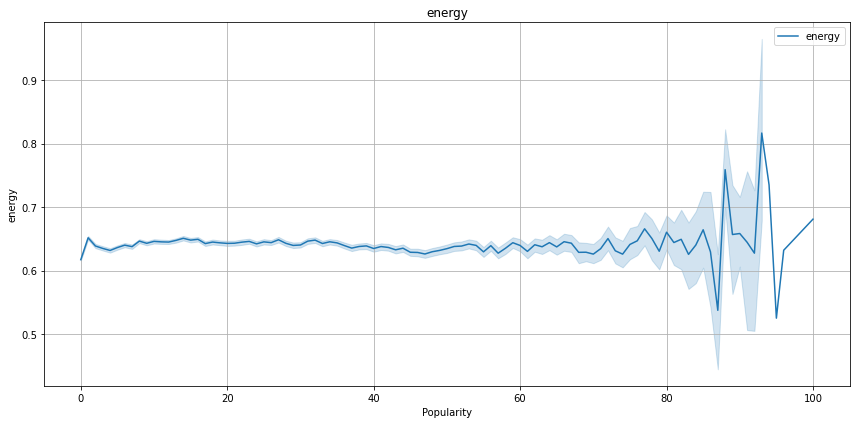

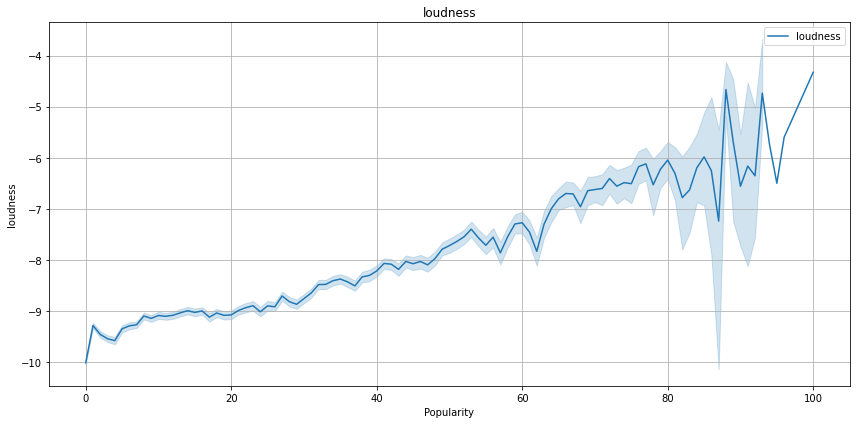

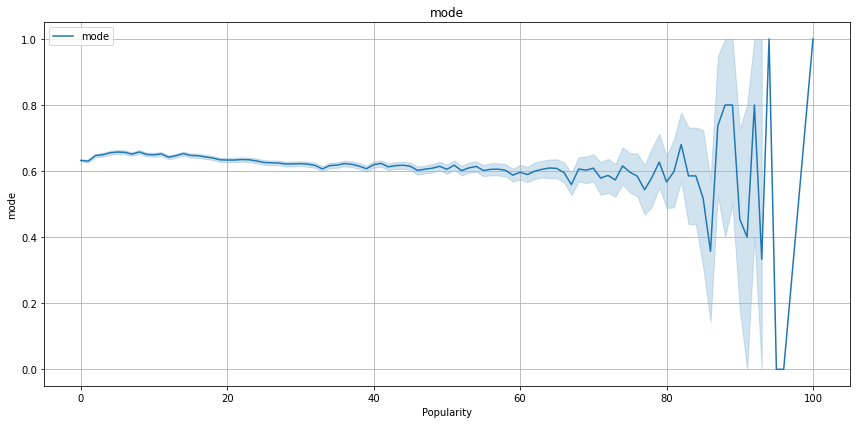

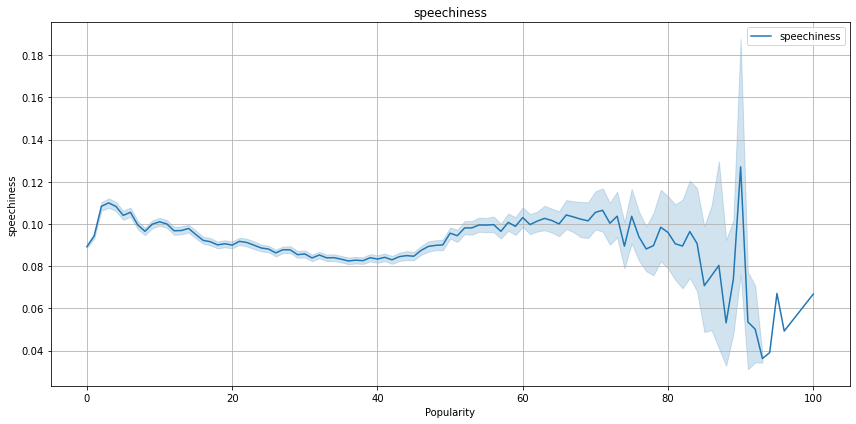

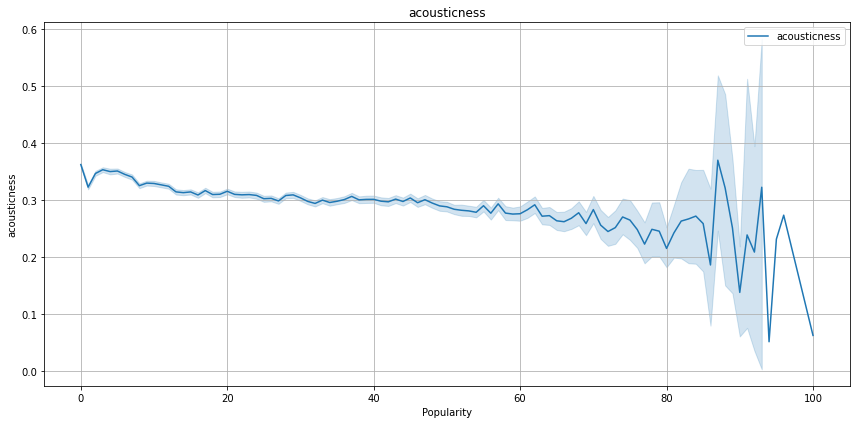

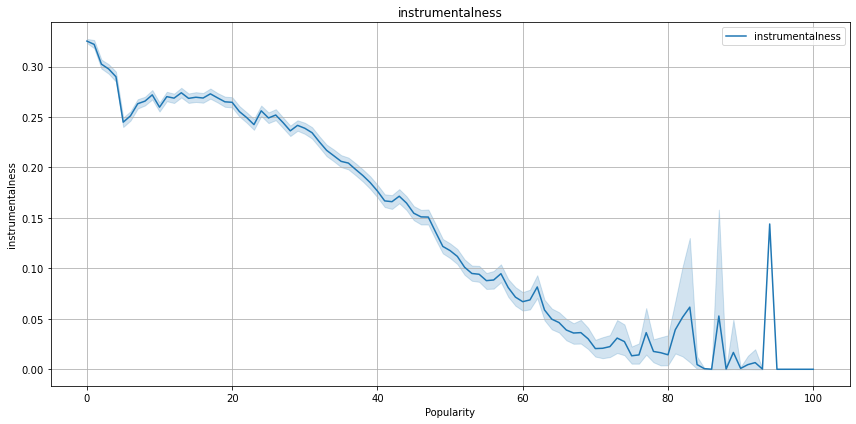

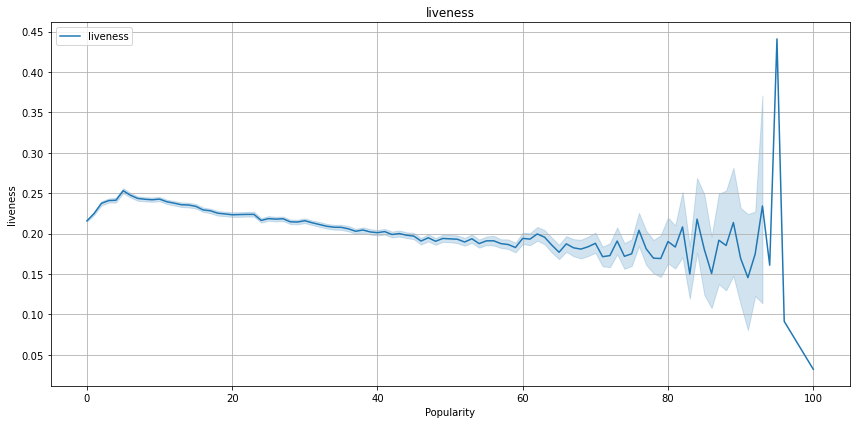

In [25]:
for feature in features_to_plot:
    plt.figure(figsize=(12, 6))  
    sns.lineplot(data=data, x='popularity', y=feature, label=feature)    
    plt.title(f'{feature}')
    plt.xlabel('Popularity')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### The line plots above helps us understand how these features affects popularity.

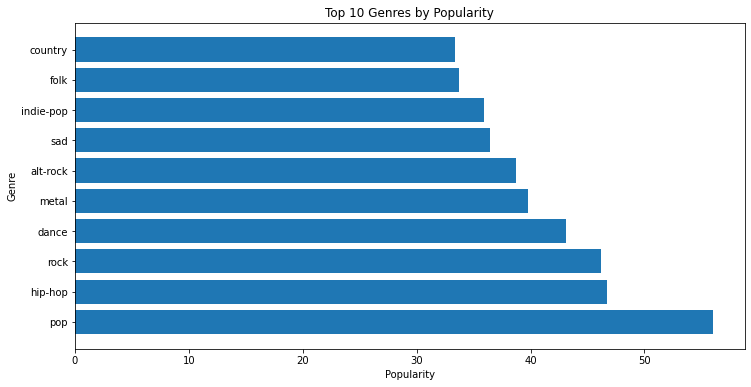

In [81]:
genre_popularity = data.groupby('genre')['popularity'].mean().reset_index()

top_10_genres = genre_popularity.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_genres['genre'], top_10_genres['popularity'])
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Popularity')

plt.show()

##### From this graph we can see the top 10 genres based on popularity. We can see that the Hip hop is the most popular genre.

In [28]:
year = data['year']
year

0          2012
1          2012
2          2012
3          2012
4          2012
           ... 
1048570    2009
1048571    2009
1048572    2009
1048573    2009
1048574    2009
Name: year, Length: 1048575, dtype: int64

In [29]:
year.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
      dtype=int64)

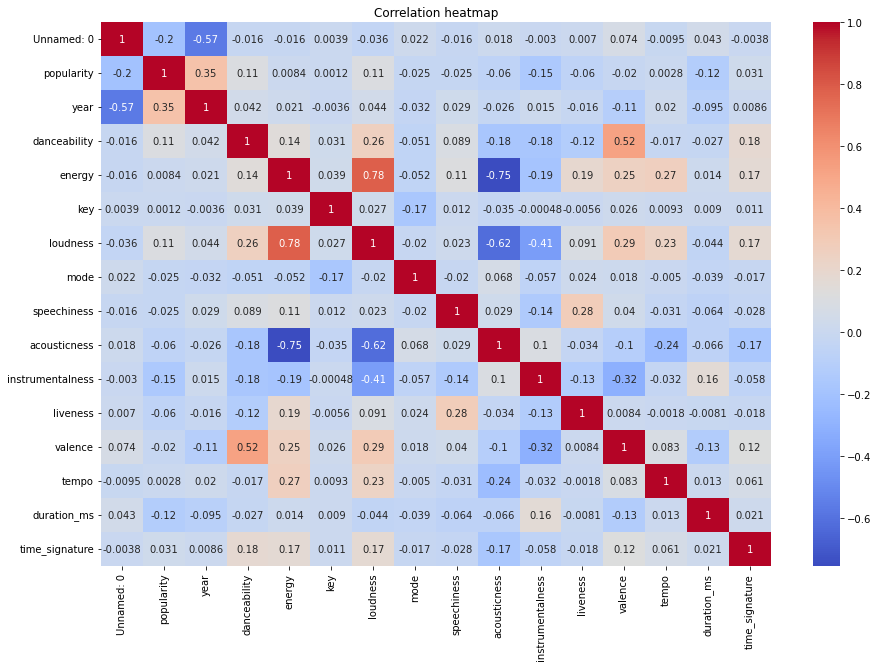

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap="coolwarm",  annot=True, )
plt.title('Correlation heatmap');
plt.show()

#####  From this map we can see that Energy and loudness are highly correlated and danceability and valence are moderately correlated. We should include these features while building model. Although other features are less correlated they also might give some valuable inputs during model building.

<AxesSubplot:xlabel='year', ylabel='Count'>

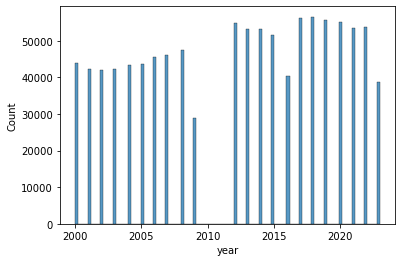

In [31]:
sns.histplot(data = data, x = 'year')

##### Number of songs released during each year.

In [33]:
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, artist_name, track_name, track_id, popularity, year, genre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature]
Index: []


In [34]:
check = data.copy()

In [35]:
check.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [36]:
df = check.drop(['artist_name','track_name','track_id','genre'], axis = 1)

In [37]:
#To remove outliers
def removeoutliers(data):
    for i in data.columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)

        IQR = Q3 - Q1

        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR

        df_no_outliers = data[(data[i] >= lower_fence) & (data[i] <= upper_fence)]
    return df_no_outliers

In [38]:
df1 = removeoutliers(df)

In [39]:
df1 = df1.drop('Unnamed: 0', axis = 1)

In [40]:
df1

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,50,2012,0.572,0.454,3,-10.286,1,0.0258,0.47700,0.000014,0.0974,0.5150,140.182,216387,4
2,57,2012,0.409,0.234,3,-13.711,1,0.0323,0.33800,0.000050,0.0895,0.1450,139.832,158960,4
3,58,2012,0.392,0.251,10,-9.845,1,0.0363,0.80700,0.000000,0.0797,0.5080,204.961,304293,4
4,54,2012,0.430,0.791,6,-5.419,0,0.0302,0.07260,0.019300,0.1100,0.2170,171.864,244320,4
5,48,2012,0.566,0.570,2,-6.420,1,0.0329,0.68800,0.000002,0.0943,0.9600,83.403,166240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,0,2009,0.665,0.661,4,-9.111,0,0.0605,0.00120,0.825000,0.0726,0.0715,131.042,423088,4
1048570,0,2009,0.419,0.748,2,-10.657,1,0.1940,0.67400,0.000022,0.0800,0.8270,171.229,873027,4
1048571,13,2009,0.576,0.787,2,-6.503,1,0.0459,0.00313,0.000621,0.3780,0.5930,112.010,348475,4
1048572,0,2009,0.534,0.314,4,-13.593,1,0.0533,0.95100,0.762000,0.2890,0.4900,138.522,1582187,4


In [41]:
data.shape

(1048575, 20)

In [42]:
df1.shape

(913943, 15)

##### We can see that 134632 rows were removed after removing outliers.

##### In order to build a logistic regression, decision tree, random forest and KNN models, I am converting the popularity feature into 2 categories. Songs with popularity below 50 will be Class 0 and above 50 into Class 1.

In [43]:
def encode_popularity(popularity):
    if popularity < 50:
        return 0
    else:
        return 1

In [44]:
df1 ['Popularity_Class'] = df1['popularity'].apply(encode_popularity)

In [45]:
df1 = df1.drop(['popularity'], axis = 1)

In [46]:
df1

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Popularity_Class
1,2012,0.572,0.454,3,-10.286,1,0.0258,0.47700,0.000014,0.0974,0.5150,140.182,216387,4,1
2,2012,0.409,0.234,3,-13.711,1,0.0323,0.33800,0.000050,0.0895,0.1450,139.832,158960,4,1
3,2012,0.392,0.251,10,-9.845,1,0.0363,0.80700,0.000000,0.0797,0.5080,204.961,304293,4,1
4,2012,0.430,0.791,6,-5.419,0,0.0302,0.07260,0.019300,0.1100,0.2170,171.864,244320,4,1
5,2012,0.566,0.570,2,-6.420,1,0.0329,0.68800,0.000002,0.0943,0.9600,83.403,166240,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2009,0.665,0.661,4,-9.111,0,0.0605,0.00120,0.825000,0.0726,0.0715,131.042,423088,4,0
1048570,2009,0.419,0.748,2,-10.657,1,0.1940,0.67400,0.000022,0.0800,0.8270,171.229,873027,4,0
1048571,2009,0.576,0.787,2,-6.503,1,0.0459,0.00313,0.000621,0.3780,0.5930,112.010,348475,4,0
1048572,2009,0.534,0.314,4,-13.593,1,0.0533,0.95100,0.762000,0.2890,0.4900,138.522,1582187,4,0


In [47]:
df1['Popularity_Class'].unique()

array([1, 0], dtype=int64)

In [48]:
df1['Popularity_Class'].value_counts()

0    867914
1     46029
Name: Popularity_Class, dtype: int64

#####  We can see that the data is imbalanced. Nearly 95% data belongs to Class 0 (songs having popularity below 50) .

# Model Building

In [49]:
x = df1.drop('Popularity_Class', axis = 1)
y = df1['Popularity_Class']

In [50]:
scaler = StandardScaler()
model = scaler.fit(x)
x_scaled = model.transform(x)

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split (x_scaled, y, random_state=42, test_size=0.3)

In [52]:
smote = SMOTE(random_state=25)
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

unique, counts = np.unique(ytrain_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution after SMOTE:", class_distribution)

Class Distribution after SMOTE: {0: 607558, 1: 607558}


In [66]:
xtrain_resampled.shape

(1215116, 14)

In [69]:
ytrain_resampled.shape

(1215116,)

In [70]:
ytrain_resampled.value_counts()

0    607558
1    607558
Name: Popularity_Class, dtype: int64

In [53]:
model=LogisticRegression().fit(xtrain_resampled,ytrain_resampled)

In [54]:
pred_test = model.predict(xtest)

In [79]:
print(accuracy_score(ytest, pred_test))

0.6983219236787109


#####  The accuracy is lower, we go for hyperparametric tuning.

In [56]:
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga', 'lbfgs', 'sag'],  
    'max_iter': [100, 500, 1000]  
}

model1 = LogisticRegression()

grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')

grid_search.fit(xtrain_resampled, ytrain_resampled)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

accuracy = best_model.score(xtest, ytest)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy: 0.6983182764795776


In [80]:
d_tree = DecisionTreeClassifier()

d_tree.fit(xtrain_resampled, ytrain_resampled)
ypred = d_tree.predict(xtest)
print(accuracy_score(ytest, ypred))

0.886028674279587


In [78]:
rforest = RandomForestClassifier()
rforest.fit(xtrain_resampled, ytrain_resampled)
ypred = rforest.predict(xtest)
print(accuracy_score(ytest, ypred))

0.9288577337034025


In [63]:
knn = KNeighborsClassifier()
knn.fit(xtrain_resampled, ytrain_resampled)
pred = knn.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88    260356
           1       0.12      0.52      0.20     13827

    accuracy                           0.79    274183
   macro avg       0.55      0.66      0.54    274183
weighted avg       0.93      0.79      0.84    274183



In [74]:
!pip install xgboost

In [75]:
import xgboost as xgb

In [77]:
model = xgb.XGBClassifier()

model.fit(xtrain_resampled, ytrain_resampled)

y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9319286753737467


##### From these 5 models, we can see that the accuracy of prediction is higher in Random forest and XGBoost models. 